Data: Iris

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic Regression

Data prep

In [5]:
# Data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Classify only 0,1
X = X[y != 2]
y = y[y != 2]

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] # add intercept to data
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

theta = np.zeros(X_train_b.shape[1])

## Sigmoid Function

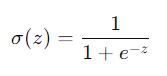
- z = X * θ


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Cross Entrophy Loss Function
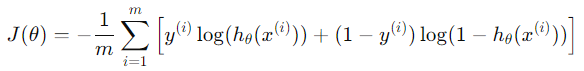  
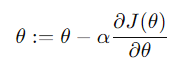

In [9]:
def cost_function(X,y,theta):
  m = len(y)
  h = sigmoid(np.dot(X,theta))
  e = 1e-5 # avoid log(0)
  J = -(1/m) * (np.dot(y, np.log(h + e)) + np.dot(1 - y, np.log(1 - h + e)))
  return J

#print(cost_function(X,y,theta))

## Gradient Descent
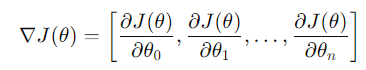  
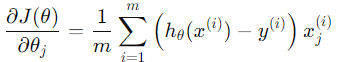  
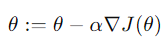  
- α: learning rate

In [10]:
def gradient_descent(X, y, theta, lr, iteration):
  m = len(y)
  cost_history = np.zeros(iteration)
  for i in range(iteration):
    h = np.dot(X, theta)
    gradient = (1/m) * np.dot(X.T, (h - y))
    theta = theta - lr * gradient
    cost_history[i] = cost_function(X, y, theta)
  return theta, cost_history

# Prediction

In [11]:
def predict(X, theta):
  probabilities = sigmoid(np.dot(X, theta))
  return [1 if p >= 0.5 else 0 for p in probabilities]

---

## Model

In [12]:
theta = np.zeros(X_train_b.shape[1])
learning_rate = 0.01
iterations = 1000

# Run with gradient descent
theta, cost_history = gradient_descent(X_train_b, y_train, theta, learning_rate, iterations)

# Result
print(f'Parameter: {theta}')
print(f'Cost: {cost_history[-1]}')

# Accuracy
predictions = predict(X_test_b, theta)
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Parameter: [ 0.0068132   0.01113404 -0.13949897  0.27070442  0.12514286]
Cost: 0.4997294018597899
Accuracy: 70.00%


- h(x) = sigmoid(0.0068132 + 0.01113404* x1 -0.13949897* x2 + 0.27070442* x3 + 0.12514286* x4)

## Run with new data

In [20]:
sample = np.array([5,4,3,2])
sample = sample.reshape(1, -1)
sample_scale = scaler.transform(sample)
sample_b = np.c_[np.ones((sample_scale.shape[0], 1)), sample_scale]
predict(sample_b, theta)

[1]

Versicolor